In [35]:
import pandas as pd
from keras import models
from keras.src.saving import register_keras_serializable
import tensorflow as tf

import matplotlib.pyplot as plt
import json


In [37]:
data_melun = pd.read_csv('data/Deva-Melun.csv' , sep=";")

@register_keras_serializable()
def mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

custom_objects = {"mse": mse}

brain =  models.load_model('modele/brain5.hdf5', custom_objects=custom_objects)


In [38]:
data_to_play = data_melun['TEMPERATURE_CONSIGNE [R]'].astype(str).str.replace(',', '.').astype(float)
data_s = data_melun['TEMPERATURE_REPRISE [R]'].astype(str).str.replace(',', '.').astype(float)


print(f'{data_to_play}  {data_s}')


0         30.000
1         30.000
2         30.000
3         30.000
4         30.000
           ...  
125918    -2.195
125919    -2.195
125920    -2.195
125921    -2.195
125922    -2.195
Name: TEMPERATURE_CONSIGNE [R], Length: 125923, dtype: float64  0          9.0
1          9.0
2          9.0
3          9.0
4          9.0
          ... 
125918    14.8
125919    14.8
125920    14.8
125921    14.8
125922    14.8
Name: TEMPERATURE_REPRISE [R], Length: 125923, dtype: float64


In [39]:
data_predicted = brain.predict(data_to_play)
print(data_predicted)

3936/3936 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step
[[28.991116 ]
 [28.991116 ]
 [28.991116 ]
 ...
 [-2.1191213]
 [-2.1191213]
 [-2.1191213]]


In [40]:
y_true = data_s
y_pred = data_predicted
nama_brain = "Melun"
ecolab = "ECOLAB 4"
modele = "Modèle 009"

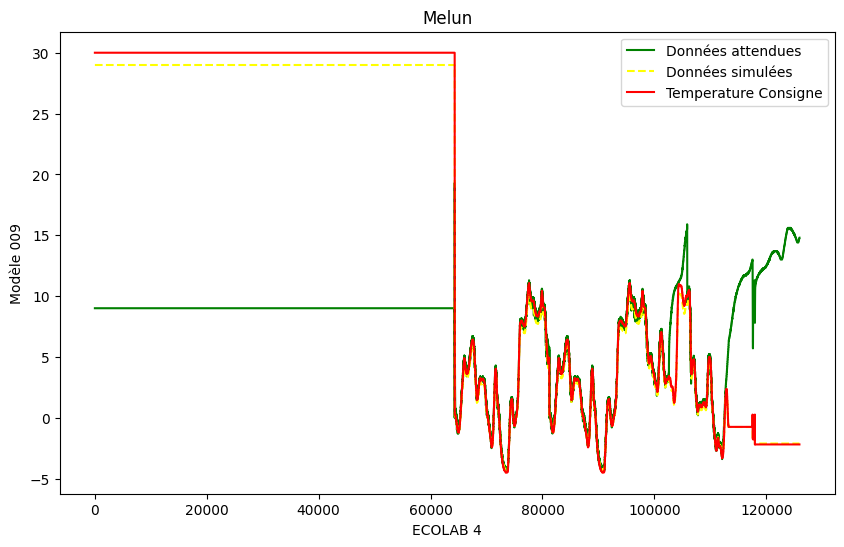

In [41]:
plt.figure(figsize=(10, 6))
plt.plot( y_true, label="Données attendues", color="green")
plt.plot( y_pred, label="Données simulées ", color="yellow", linestyle="dashed")
plt.plot(data_to_play , color="red" , label="Temperature Consigne")
plt.legend()
plt.title(f"{nama_brain}")
plt.xlabel(f"{ecolab}")
plt.ylabel(f"{modele}")
plt.show()